In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [6]:
train = pd.read_csv('train.csv')

In [53]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
bons = train[['LotFrontage', 'OverallQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'SalePrice']]

In [49]:
samp = train[['PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

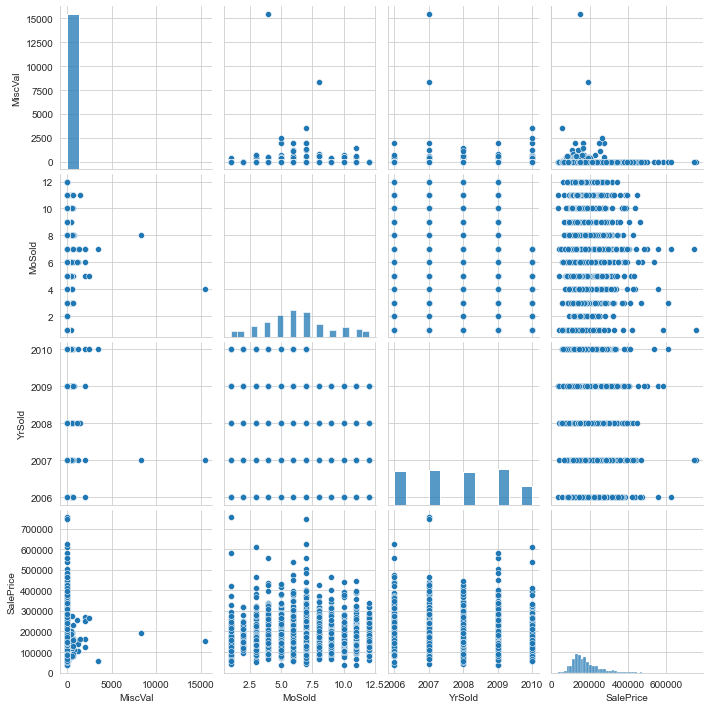

In [50]:
sns.pairplot(samp)

In [51]:
train[['PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']].nunique()

PoolQC            3
Fence             4
MiscFeature       4
MiscVal          21
MoSold           12
YrSold            5
SaleType          9
SaleCondition     6
dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

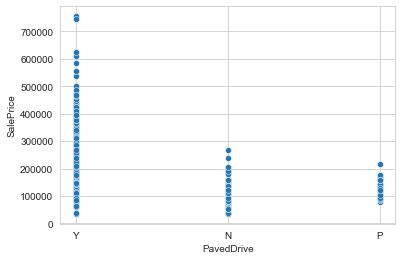

In [48]:
sns.scatterplot(x='PavedDrive', y='SalePrice', data=train)

In [7]:
train = train[['LotFrontage', 'OverallQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'SalePrice']]

In [58]:
train.head()

,LotFrontage,OverallQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,PavedDrive
0,65.0,7,Gd,856,Ex,856,854,1710,Gd,8,2003.0,2,548,Y
1,80.0,6,Gd,1262,Ex,1262,0,1262,TA,6,1976.0,2,460,Y
2,68.0,7,Gd,920,Ex,920,866,1786,Gd,6,2001.0,2,608,Y
3,60.0,7,TA,756,Gd,961,756,1717,Gd,7,1998.0,3,642,Y
4,84.0,8,Gd,1145,Ex,1145,1053,2198,Gd,9,2000.0,3,836,Y


In [61]:
train['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [8]:
dic = {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'Po' : 0}

In [9]:
train['BsmtQual'] = train['BsmtQual'].map(dic)
train['HeatingQC'] = train['HeatingQC'].map(dic)
train['KitchenQual'] = train['KitchenQual'].map(dic)
train = train[['LotFrontage', 'OverallQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'PavedDrive', 'SalePrice']]
paved = pd.get_dummies(train['PavedDrive'], drop_first=True)
train = pd.concat([train.drop('PavedDrive', axis=1), paved], axis=1)

In [52]:
train.head()

,LotFrontage,OverallQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,P,Y
0,65.0,7,3.0,856,4,856,854,1710,3,8,2003.0,2,548,208500,0,1
1,80.0,6,3.0,1262,4,1262,0,1262,2,6,1976.0,2,460,181500,0,1
2,68.0,7,3.0,920,4,920,866,1786,3,6,2001.0,2,608,223500,0,1
3,60.0,7,2.0,756,3,961,756,1717,3,7,1998.0,3,642,140000,0,1
4,84.0,8,3.0,1145,4,1145,1053,2198,3,9,2000.0,3,836,250000,0,1


<AxesSubplot:>

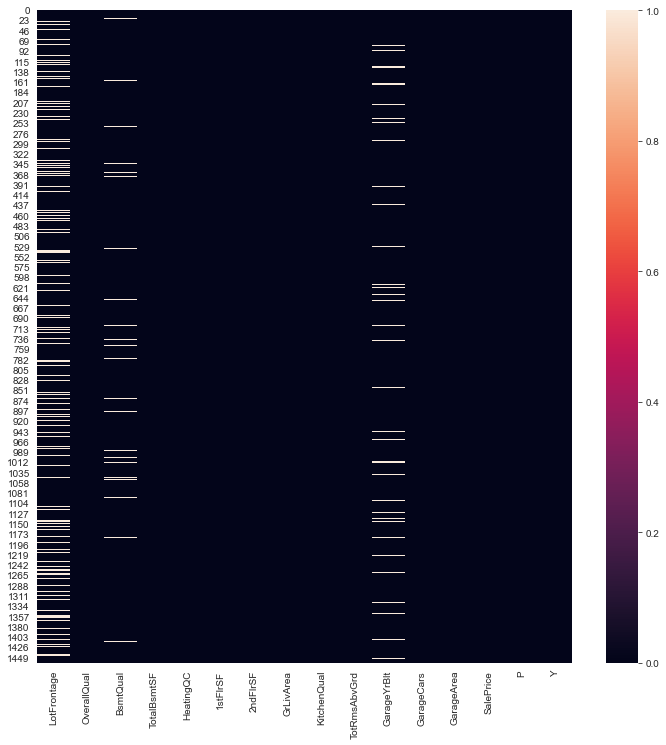

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.isna(train))

In [97]:
train[pd.isna(train['LotFrontage'])]['SalePrice'].mean()

181620.07335907337

In [13]:
train['LotFrontage'].mean()

70.04995836802665

In [91]:
#70 em train, 68 em test
def inputa_Frontage(x):
    if pd.isna(x):
        return 68
    else:
        return x

In [16]:
train['LotFrontage'] = train['LotFrontage'].apply(inputa_Frontage)

<AxesSubplot:xlabel='LotFrontage', ylabel='BsmtQual'>

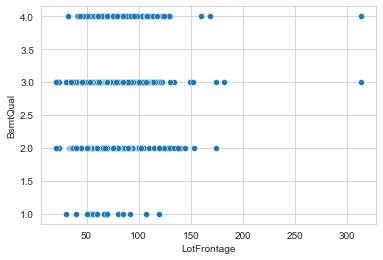

In [20]:
sns.scatterplot(x='LotFrontage', y='BsmtQual', data=train)

In [28]:
print('Basement N: ', train[pd.isna(train['BsmtQual'])]['SalePrice'].mean())
print('Basement 1: ', train[train['BsmtQual'] == 1]['SalePrice'].mean())
print('Basement 2: ', train[train['BsmtQual'] == 2]['SalePrice'].mean())
print('Basement 3: ', train[train['BsmtQual'] == 3]['SalePrice'].mean())
print('Basement 4: ', train[train['BsmtQual'] == 4]['SalePrice'].mean())

Basement N:  105652.8918918919
Basement 1:  115692.02857142857
Basement 2:  140759.81818181818
Basement 3:  202688.4789644013
Basement 4:  327041.04132231406


In [29]:
def inputa_Basement(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [30]:
train['BsmtQual'] = train['BsmtQual'].apply(inputa_Basement)

In [32]:
train['GarageYrBlt'].mean()

1978.5061638868744

In [35]:
train['SalePrice'].mean()

180921.19589041095

In [37]:
train[pd.isna(train['GarageYrBlt'])]['SalePrice'].mean()

103317.28395061729

In [54]:
def inputa_Garage(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [55]:
train['GarageYrBlt'] = train['GarageYrBlt'].apply(inputa_Garage)

<AxesSubplot:>

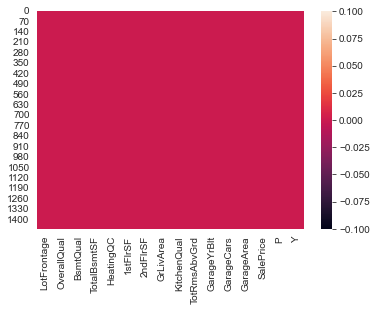

In [56]:
sns.heatmap(pd.isna(train))

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3)

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(x_train, y_train)

LinearRegression()

In [98]:
predict = lm.predict(x_test)

<AxesSubplot:xlabel='SalePrice'>

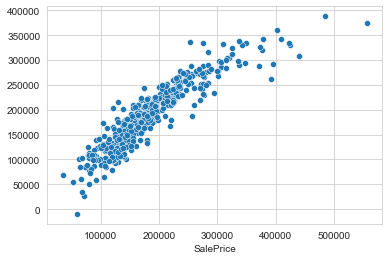

In [99]:
sns.scatterplot(x=y_test, y=predict)

In [100]:
np.sqrt(metrics.mean_squared_error(y_test, predict))

29845.55341422943

In [95]:
test = pd.read_csv('test.csv')

In [89]:
test['LotFrontage'].mean()

68.58035714285714

In [96]:
test['BsmtQual'] = test['BsmtQual'].map(dic)
test['HeatingQC'] = test['HeatingQC'].map(dic)
test['KitchenQual'] = test['KitchenQual'].map(dic)
test = test[['LotFrontage', 'OverallQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'PavedDrive']]
paved = pd.get_dummies(test['PavedDrive'], drop_first=True)
test = pd.concat([test.drop('PavedDrive', axis=1), paved], axis=1)
test['LotFrontage'] = test['LotFrontage'].apply(inputa_Frontage)
test['BsmtQual'] = test['BsmtQual'].apply(inputa_Basement)
test['GarageYrBlt'] = test['GarageYrBlt'].apply(inputa_Garage)

In [97]:
test.head()

,LotFrontage,OverallQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,P,Y
0,80.0,5,2.0,882.0,2,896,0,896,2.0,5,1961.0,1.0,730.0,0,1
1,81.0,6,2.0,1329.0,2,1329,0,1329,3.0,6,1958.0,1.0,312.0,0,1
2,74.0,5,3.0,928.0,3,928,701,1629,2.0,6,1997.0,2.0,482.0,0,1
3,78.0,6,2.0,926.0,4,926,678,1604,3.0,7,1998.0,2.0,470.0,0,1
4,43.0,8,3.0,1280.0,4,1280,0,1280,3.0,5,1992.0,2.0,506.0,0,1


<AxesSubplot:>

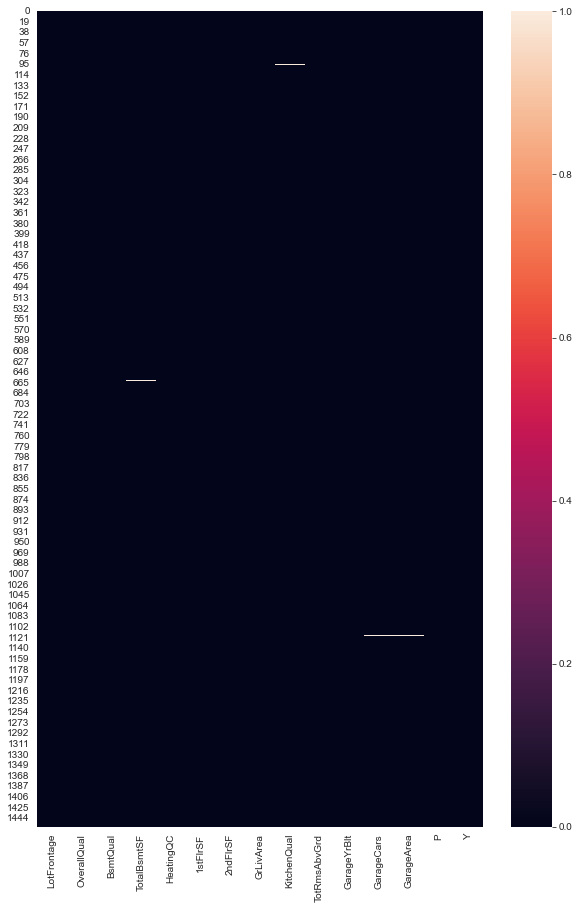

In [104]:
plt.figure(figsize=(10,15))
sns.heatmap(pd.isna(test))

In [108]:
test.iloc[1116]

LotFrontage       50.0
OverallQual        5.0
BsmtQual           3.0
TotalBsmtSF      859.0
HeatingQC          4.0
1stFlrSF         942.0
2ndFlrSF         886.0
GrLivArea       1828.0
KitchenQual        3.0
TotRmsAbvGrd       6.0
GarageYrBlt        0.0
GarageCars         0.0
GarageArea         0.0
P                  0.0
Y                  1.0
Name: 1116, dtype: float64

In [107]:
test['GarageCars'] = test['GarageCars'].apply(inputa_Garage)
test['GarageArea'] = test['GarageArea'].apply(inputa_Garage)

In [124]:
test['TotalBsmtSF'].mean()

1046.1179698216736

In [126]:
train[train['TotalBsmtSF'] == 0]['SalePrice'].mean()

105652.8918918919

In [127]:
train['SalePrice'].mean()

180921.19589041095

In [128]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].apply(inputa_Basement)

In [132]:
print('Cozinha 1: ',train[train['KitchenQual'] == 1]['SalePrice'].mean())
print('Cozinha 2: ',train[train['KitchenQual'] == 2]['SalePrice'].mean())
print('Cozinha 3: ',train[train['KitchenQual'] == 3]['SalePrice'].mean())
print('Cozinha 4: ',train[train['KitchenQual'] == 4]['SalePrice'].mean())

Cozinha 1:  105565.20512820513
Cozinha 2:  139962.51156462586
Cozinha 3:  212116.02389078497
Cozinha 4:  328554.67


In [133]:
train['KitchenQual'].value_counts()

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64

In [134]:
aux[pd.isna(aux['KitchenQual'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [136]:
aux2 = pd.read_csv('train.csv')

In [137]:
aux2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
aux2[aux2['KitchenAbvGr'] == 1]['KitchenQual'].value_counts()

TA    675
Gd    583
Ex    100
Fa     34
Name: KitchenQual, dtype: int64

In [145]:
def inputa_kitchen(x):
    if pd.isna(x):
        return 2
    else:
        return x

In [146]:
test.head()

,LotFrontage,OverallQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,P,Y
0,80.0,5,2.0,882.0,2,896,0,896,2.0,5,1961.0,1.0,730.0,0,1
1,81.0,6,2.0,1329.0,2,1329,0,1329,3.0,6,1958.0,1.0,312.0,0,1
2,74.0,5,3.0,928.0,3,928,701,1629,2.0,6,1997.0,2.0,482.0,0,1
3,78.0,6,2.0,926.0,4,926,678,1604,3.0,7,1998.0,2.0,470.0,0,1
4,43.0,8,3.0,1280.0,4,1280,0,1280,3.0,5,1992.0,2.0,506.0,0,1


In [149]:
test['KitchenQual'] = test['KitchenQual'].apply(inputa_kitchen)

<AxesSubplot:>

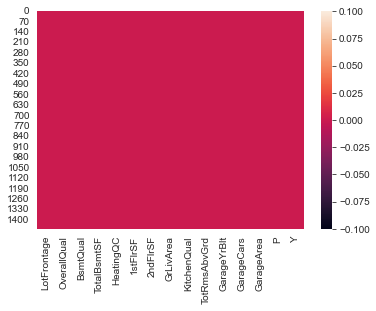

In [150]:
sns.heatmap(pd.isna(test))

In [156]:
output = pd.Series(lm.predict(test))
resposta = pd.concat([aux['Id'], output], axis=1)
resposta.rename(columns={0: 'SalePrice'}, inplace=True)
resposta.to_csv('submit2.csv', index=False)